Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


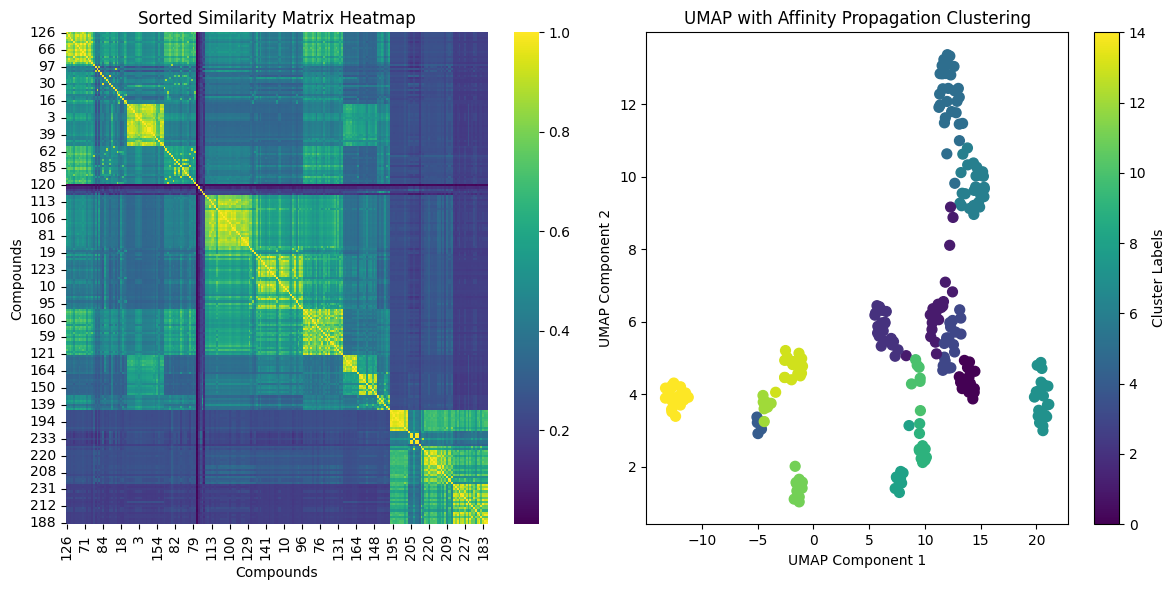

In [84]:
# This portion was done with the help of lab mentor Jonathan Tang.

import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Exclude the zeroth row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction using the Tanimoto matrix as the distance metric
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Sort similarity matrix by cluster identity
sorted_indices = np.argsort(labels)
sorted_similarity_matrix = similarity_matrix.iloc[sorted_indices, sorted_indices]

# Visualize the sorted heatmap of the similarity matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(sorted_similarity_matrix, cmap='viridis')
plt.title('Sorted Similarity Matrix Heatmap')
plt.xlabel('Compounds')
plt.ylabel('Compounds')

# Visualize the UMAP results with colors based on Affinity Propagation clustering
plt.subplot(1, 2, 2)
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis', s=50)
plt.title('UMAP with Affinity Propagation Clustering')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Cluster Labels')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_output.pdf', format='pdf')

plt.show()


Publication covered or not plots

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/vr/qywvn9w14n92rdhcqkrz0brdg2zvlf/T/ipykernel_88676/4141443313.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', cmap='viridis', s=50, label='Uncovered = 0')
/var/folders/vr/qywvn9w14n92rdhcqkrz0brdg2zvlf/T/ipykernel_88676/4141443313.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(red_points[:, 0], red_points[:, 1], c='red', cmap='viridis', s=50, label='Covered = 1')
/var/folders/vr/qywvn9w14n92rdhcqkrz0brdg2zvlf/T/ipykernel_88676/4141443313.py:65: UserWarning: No data for colormapping provided via 'c'. Parameter

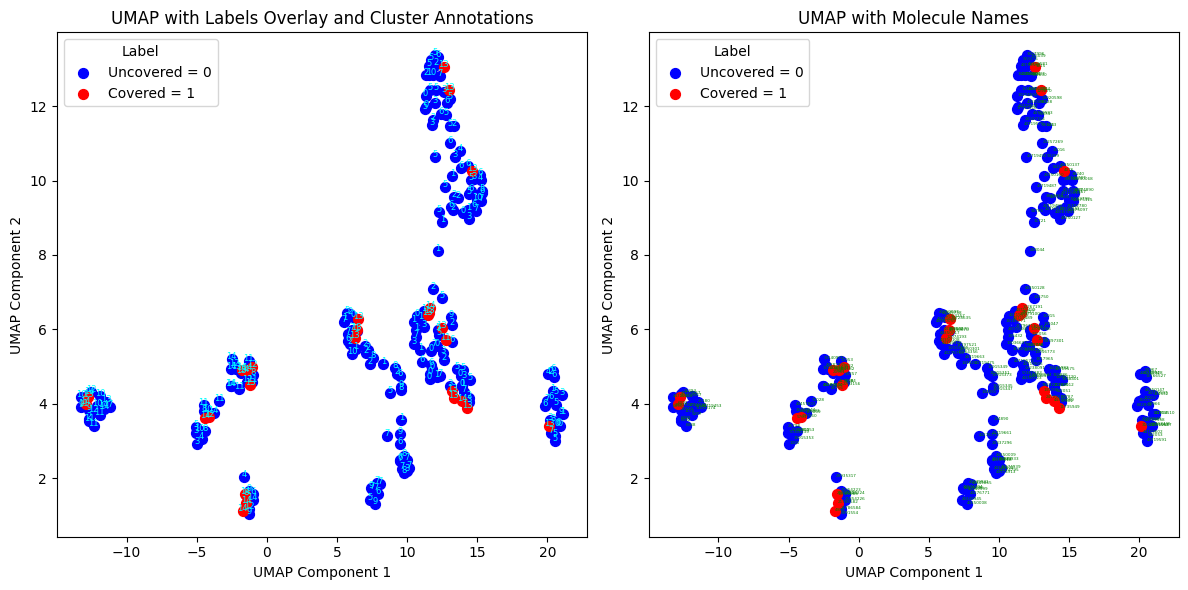

In [108]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for coloring and molecule names
color_data = pd.read_csv('publication_molecules.csv')

# Extract labels for coloring, excluding the first row
labels_color = color_data.iloc[1:, 1].abs()

# Map labels to colors (0 to blue, 1 to red)
color_map = {0: 'blue', 1: 'red'}
colors = labels_color.map(color_map)

# Separate blue and red points
blue_points = umap_result[labels_color == 0]
red_points = umap_result[labels_color == 1]

# Load molecule names from shulginclassification.csv
molecule_names = pd.read_csv('shulginclassification.csv', index_col=0).iloc[1:, 0]

# Visualize the UMAP results with overlaid clusters and annotations
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', cmap='viridis', s=50, label='Uncovered = 0')
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', cmap='viridis', s=50, label='Covered = 1')

# Annotate blue points with cluster labels
for i, (x, y) in enumerate(blue_points):
    plt.annotate(labels[i], (x, y), textcoords="offset points", xytext=(0,0), ha='center', fontsize=6, color='cyan')

# Annotate red points with cluster labels
for i, (x, y) in enumerate(red_points):
    plt.annotate(labels[i+len(blue_points)], (x, y), textcoords="offset points", xytext=(0,0), ha='center', fontsize=6, color='cyan')

plt.title('UMAP with Labels Overlay and Cluster Annotations')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Label')

# Plot UMAP results with molecule names
plt.subplot(1, 2, 2)
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', cmap='viridis', s=50, label='Uncovered = 0')
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', cmap='viridis', s=50, label='Covered = 1')

# Annotate data points with molecule names from shulginclassification.csv
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names.iloc[i], fontsize=3, color='green')

plt.title('UMAP with Molecule Names')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Label')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_names_covered.pdf', format='pdf')

plt.show()


Shulgin Classification Input - Tryp/Phen

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/vr/qywvn9w14n92rdhcqkrz0brdg2zvlf/T/ipykernel_88676/1638687767.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', cmap='viridis', s=50, label='Phenethylamine = 0')
/var/folders/vr/qywvn9w14n92rdhcqkrz0brdg2zvlf/T/ipykernel_88676/1638687767.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(red_points[:, 0], red_points[:, 1], c='red', cmap='viridis', s=50, label='Tryptamine = 1')
/var/folders/vr/qywvn9w14n92rdhcqkrz0brdg2zvlf/T/ipykernel_88676/1638687767.py:65: UserWarning: No data for colormapping provided via 'c'. P

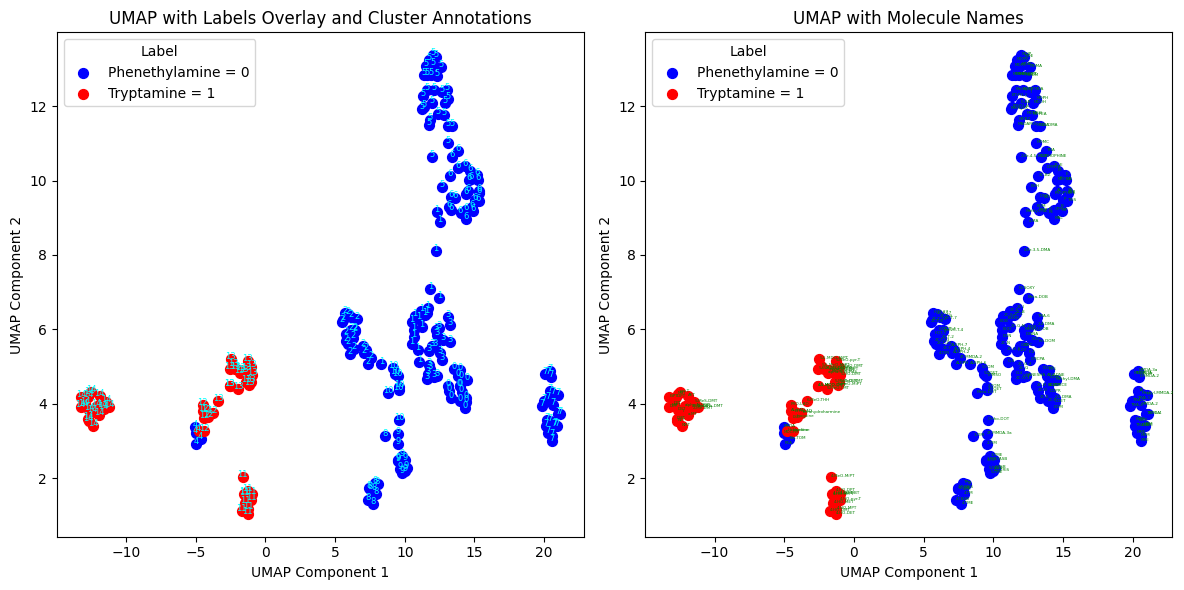

In [104]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for coloring and molecule names
data = pd.read_csv('shulginclassification.csv')

# Extract labels for coloring, excluding the first row
labels_color = data.iloc[1:, 2].abs()

# Map labels to colors (0 to blue, 1 to red)
color_map = {0: 'blue', 1: 'red'}
colors = labels_color.map(color_map)

# Separate blue and red points
blue_points = umap_result[labels_color == 0]
red_points = umap_result[labels_color == 1]

# Load molecule names from publication_molecules.csv
molecule_names = pd.read_csv('publication_molecules.csv', index_col=0).iloc[1:].index

# Visualize the UMAP results with overlaid red points on blue points and molecule names
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', cmap='viridis', s=50, label='Phenethylamine = 0')
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', cmap='viridis', s=50, label='Tryptamine = 1')

# Annotate blue points with cluster labels
for i, (x, y) in enumerate(blue_points):
    plt.annotate(labels[i], (x, y), textcoords="offset points", xytext=(0,0), ha='center', fontsize=6, color='cyan')

# Annotate red points with cluster labels
for i, (x, y) in enumerate(red_points):
    plt.annotate(labels[i+len(blue_points)], (x, y), textcoords="offset points", xytext=(0,0), ha='center', fontsize=6, color='cyan')

plt.title('UMAP with Labels Overlay and Cluster Annotations')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Label')

# Plot UMAP results with molecule names
plt.subplot(1, 2, 2)
plt.scatter(blue_points[:, 0], blue_points[:, 1], c='blue', cmap='viridis', s=50, label='Phenethylamine = 0')
plt.scatter(red_points[:, 0], red_points[:, 1], c='red', cmap='viridis', s=50, label='Tryptamine = 1')

# Annotate data points with molecule names from publication_molecules.csv
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names[i], fontsize=3, color='green')

plt.title('UMAP with Molecule Names')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Label')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_names_phentrypdistinction.pdf', format='pdf')

plt.show()


In [92]:
color_data

NameError: name 'color_data' is not defined

COLORING SIMILARITY TO LSD

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


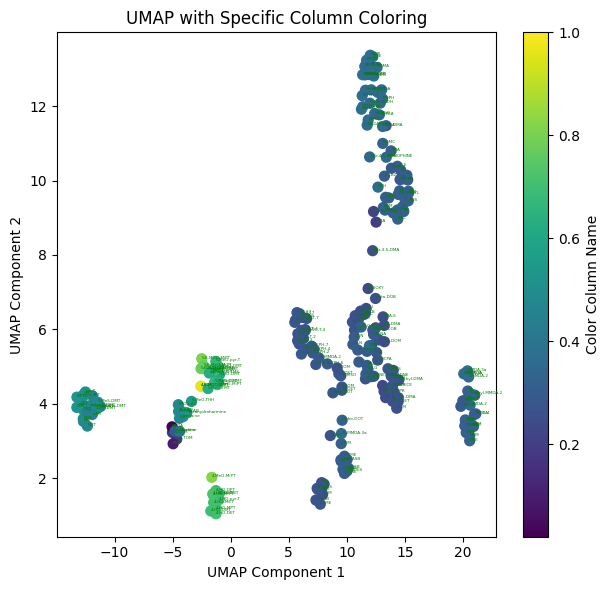

In [83]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Select the specific column from the similarity matrix for coloring
column_index = 206  # Absolute column index to take values from (starting from absolute row 2 to end)
color_column = similarity_matrix.iloc[1:, column_index]  # Exclude the first row and take values from the specified column


# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Set LSD as the reference molecule
lsd_index = 206  # Absolute index of LSD

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for molecule names
molecule_names = pd.read_csv('publication_molecules.csv', index_col=0).iloc[1:].index

# Visualize the UMAP results with overlaid clusters and molecule names
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=color_column, cmap='viridis', s=50)
plt.colorbar(label='Color Column Name')
plt.title('UMAP with Specific Column Coloring')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate data points with molecule names
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names[i], fontsize=3, color='green')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_specific_column_lsd.pdf', format='pdf')

plt.show()


Coloring Similarity to MDMA

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


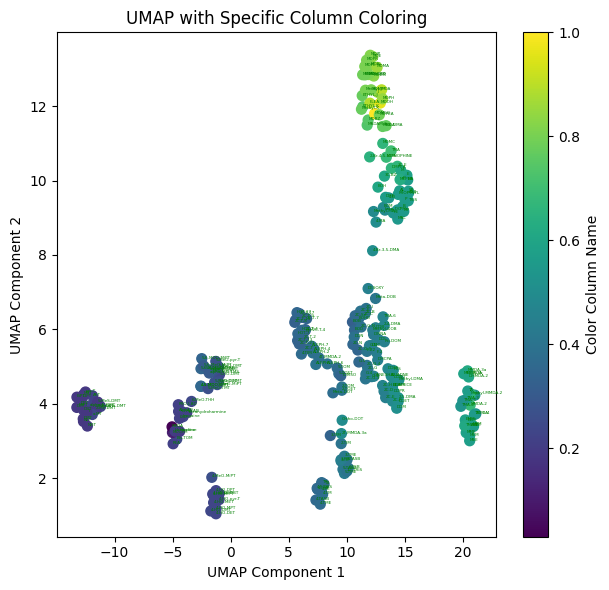

In [82]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Select the specific column from the similarity matrix for coloring
column_index = 110  # Absolute column index to take values from (starting from absolute row 2 to end)
color_column = similarity_matrix.iloc[1:, column_index]  # Exclude the first row and take values from the specified column


# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for molecule names
molecule_names = pd.read_csv('publication_molecules.csv', index_col=0).iloc[1:].index

# Visualize the UMAP results with overlaid clusters and molecule names
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=color_column, cmap='viridis', s=50)
plt.colorbar(label='Color Column Name')
plt.title('UMAP with Specific Column Coloring')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate data points with molecule names
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names[i], fontsize=3, color='green')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_specific_column_mdma.pdf', format='pdf')

plt.show()


COLORING SIMIARLITY TO DMT

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


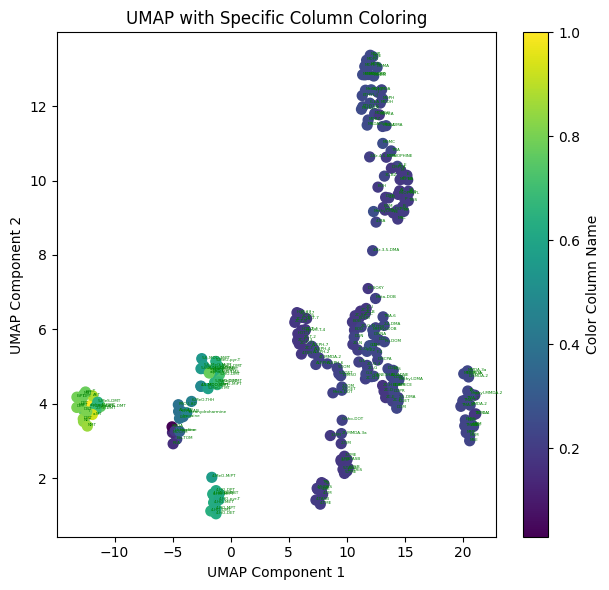

In [81]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Select the specific column from the similarity matrix for coloring
column_index = 186  # Absolute column index to take values from (starting from absolute row 2 to end)
color_column = similarity_matrix.iloc[1:, column_index]  # Exclude the first row and take values from the specified column


# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for molecule names
molecule_names = pd.read_csv('publication_molecules.csv', index_col=0).iloc[1:].index

# Visualize the UMAP results with overlaid clusters and molecule names
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=color_column, cmap='viridis', s=50)
plt.colorbar(label='Color Column Name')
plt.title('UMAP with Specific Column Coloring')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate data points with molecule names
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names[i], fontsize=3, color='green')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_specific_column_dmt.pdf', format='pdf')

plt.show()


COLORING SIMILARITY TO PSILOCYBIN

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


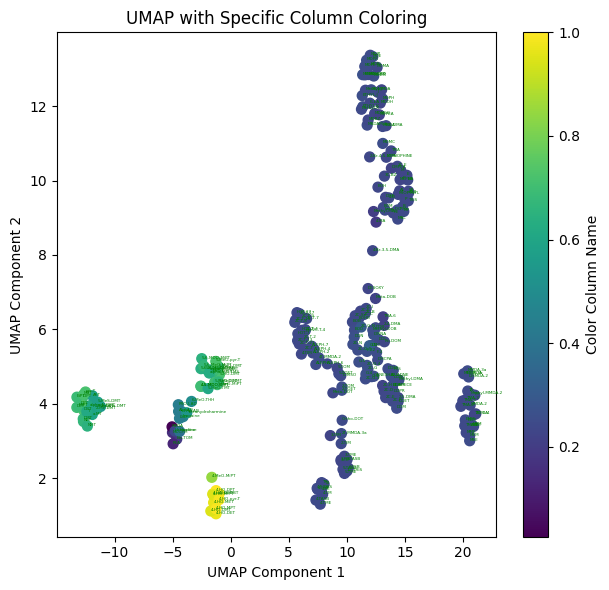

In [80]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Select the specific column from the similarity matrix for coloring
column_index = 198  # Absolute column index to take values from (starting from absolute row 2 to end)
color_column = similarity_matrix.iloc[1:, column_index]  # Exclude the first row and take values from the specified column


# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for molecule names
molecule_names = pd.read_csv('publication_molecules.csv', index_col=0).iloc[1:].index

# Visualize the UMAP results with overlaid clusters and molecule names
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=color_column, cmap='viridis', s=50)
plt.colorbar(label='Color Column Name')
plt.title('UMAP with Specific Column Coloring')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate data points with molecule names
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names[i], fontsize=3, color='green')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_specific_column_psilocybin.pdf', format='pdf')

plt.show()


COLOR SIMILARITY TO MESCALINE

Number of clusters found: 15


/Users/ctang3/anaconda3/envs/intropython/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


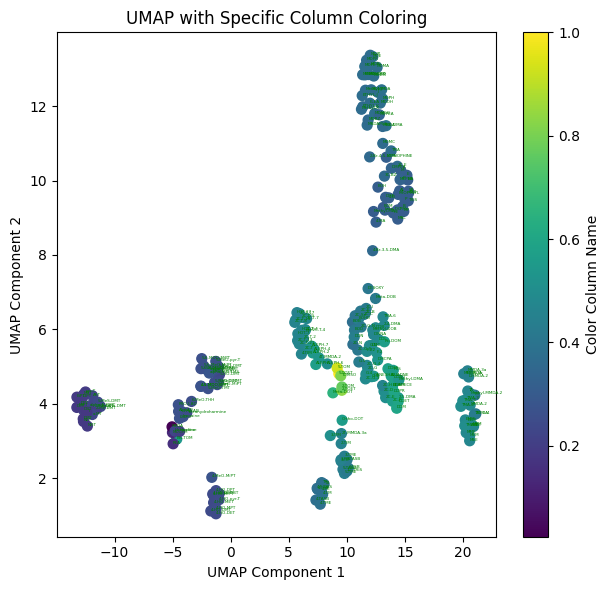

In [78]:
import pandas as pd
import umap
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load similarity matrix
similarity_matrix = pd.read_csv('tanimoto_matrix.csv', index_col=0)

# Select the specific column from the similarity matrix for coloring
column_index = 169  # Absolute column index to take values from (starting from absolute row 2 to end)
color_column = similarity_matrix.iloc[1:, column_index]  # Exclude the first row and take values from the specified column


# Exclude the first row and column
similarity_matrix = similarity_matrix.iloc[1:, 1:]

# Apply Affinity Propagation clustering on the similarity matrix
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(similarity_matrix)
n_clusters = len(set(labels))

print(f"Number of clusters found: {n_clusters}")

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.5)
umap_result = reducer.fit_transform(similarity_matrix)

# Load data for molecule names
molecule_names = pd.read_csv('publication_molecules.csv', index_col=0).iloc[1:].index

# Visualize the UMAP results with overlaid clusters and molecule names
plt.figure(figsize=(12, 6))

# Plot UMAP results with clusters and annotations
plt.subplot(1, 2, 1)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=color_column, cmap='viridis', s=50)
plt.colorbar(label='Color Column Name')
plt.title('UMAP with Specific Column Coloring')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate data points with molecule names
for i, (x, y) in enumerate(umap_result):
    plt.text(x, y, molecule_names[i], fontsize=3, color='green')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('umap_with_specific_column_mescaline.pdf', format='pdf')

plt.show()
